In [104]:
# <https://joshspicer.com/husky-hunt-2019>

# TODO:
# - Table with "solves per hour"
# - Map with Draggable Timeline rendering pins of solved/unsolved
# - Average solve time. (check drive for list upload times.)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, json
from datetime import datetime


In [105]:
# Parse data files into `clue_data`, `clue_status`, and `hunters`

path_to_json = './data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files.sort()


clue_data = {}
clue_status = {}
hunters = {}
for f in json_files:
    with open("./data/"+f) as json_file:
        tmp_json = json.load(json_file)
        if "clues" in tmp_json:
            date = f.replace("-04:00.json", "")
            # Clues
            for identifer, clue in tmp_json['clues'].items():
                # Grab Relevant Fields
                clueList = clue['clueListId']
                clueNum = clue['clueNum'].zfill(3)
                clueName = clueList + clueNum
                
                # Record General Clue Data (location, title)
                if clueName not in clue_data:
                    clue_data[clueName] = {"inCrawl": clue['inCrawl'],
                                           "lat": clue["latitude"],
                                           "long": clue['longitude'],
                                           "title": clue['title']}
                    
                # Record Clue's status at this moment in time
                if clueName not in clue_status:
                    clue_status[clueName] = {}
                clue_status[clueName][date] =  clue["completed"]
                                            
        # Hunters
        if "hunters" in tmp_json:
            hunters[f.replace("-04:00.json", "")] = tmp_json["hunters"]
            

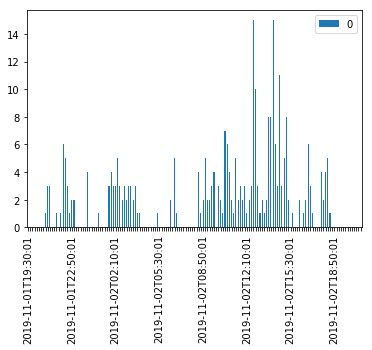

In [106]:
# Clues Completion Times

clueSolvedAt = {}
cluesSolvedAtCount = {}

for clueNum, clue in clue_status.items():
    for time, isSolved in clue.items():
        # Init Data Structure
        if time not in clueSolvedAt:
            clueSolvedAt[time] = []
            cluesSolvedAtCount[time] = 0
        
        # Catches first time the clue swaps from False --> True
        if isSolved == True:
            clueSolvedAt[time].append(clueNum)
            cluesSolvedAtCount[time] += 1
            break
            
            
clueSolvedAtDF = pd.DataFrame.from_dict(cluesSolvedAtCount, orient="index")
ax = clueSolvedAtDF.plot(kind="bar")

# Reduce amount of x-axis labels rendered
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 20) != 0:
        t.set_visible(False)
    